**PROJECT NAME**: Bankloanprediction

1. LEARNING : SUPERVISED LEARNING
2. MACHINE LEARNING : CLASSIFICATION
3. MODELS : Logistic Regression, SVM, KNN

**PROJECT DESCRIPTION** and **DATA EXPLANATION**

The dataset we are using here  contains data on 5000 customers. The data has the  customer information (age, income, etc.), the customer's relationship with the bank and the customer response to the last personal loan . Among these 5000 customers, only 480 which come to around 9.5% who  accepted the personal loan that was offered to them  earlier.

This  is about a bank  whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). This dataset comes under Supervised Learning,Domain: Banking domain

This is a classification problem.The classification goal is to predict the possibility of a liability customer buying personal loans.

**COLUMNS EXPLANATION**

There are 2 nominal variables:
1.ID    
2.Zip Code

There are 2 Ordinal Categorical Variables:
1.Family - Family size of the customer    
2.Education - education level of the customer

There are 5 independent variables:
1.Age:Age of the customer
2.Experience:Years of experience of the customer
3.Income:Annual income in dollars
4.CCAvg:Average credit card spending
5.Mortage:Value of House Mortgage

There are 5 binary category variables:
1.Personal Loan:Did this customer accept the personal loan offered in the last campaign?
2.Securities Account:Does the customer have a securities account with the bank?
3.CD Account:Does the customer have a certificate of deposit (CD) account with the bank?
4.Online:Does the customer use internet banking facilities?
5.Credit Card:Does the customer use a credit card issued by UniversalBank?


Target variable is :Personal Loan

**Importing all neccessary Libraries for project**

In [1]:
#importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing libraries to run models**

In [2]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df= pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#reading first 5 rows of the dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#reading last 5 rows of the dataset
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


# Raw data visualization


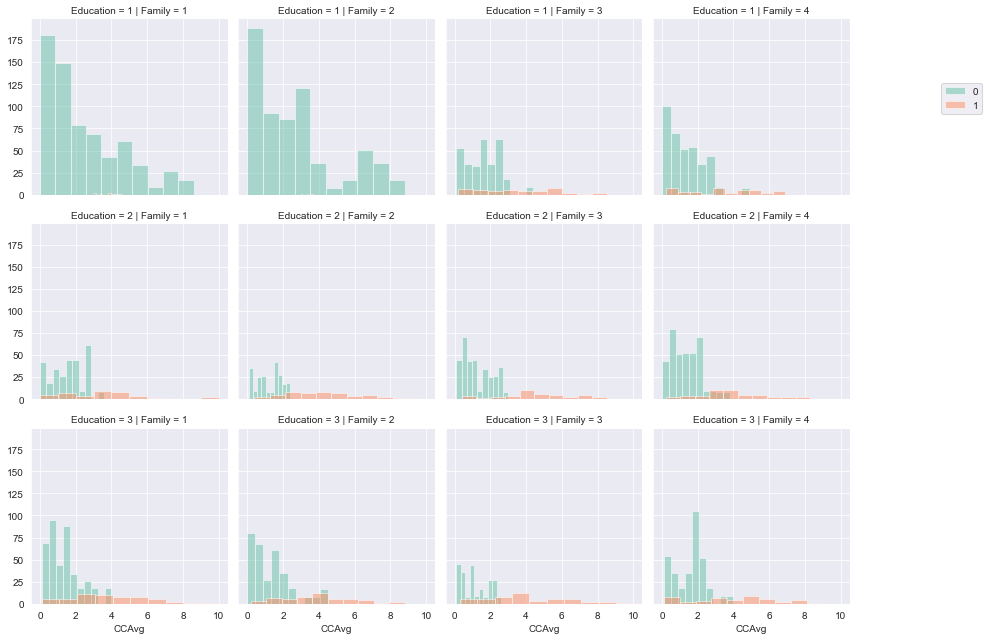

In [6]:
import seaborn as sns
sns.set_style('darkgrid')
g=sns.FacetGrid(df,row='Education',col='Family',hue='Personal Loan',palette='Set2')
g=g.map(plt.hist, 'CCAvg', alpha=0.5)
plt.legend(bbox_to_anchor=(1.7,3))

It can be inferred that usually Undergraduates with a small family donot tend apply for a loan.

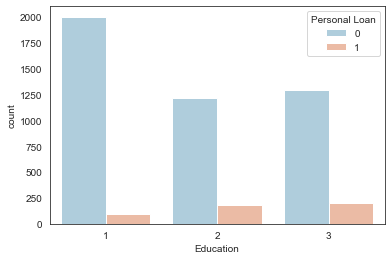

In [7]:
sns.set_style('white')
sns.countplot(data=df,x='Education',hue='Personal Loan',palette='RdBu_r')

Most of the loan applicants are Professionals

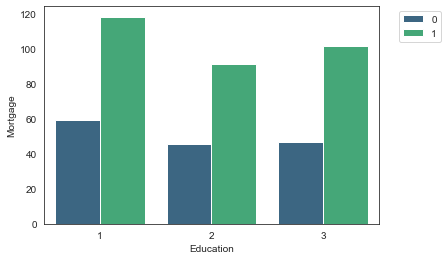

In [8]:
sns.barplot('Education','Mortgage',hue='Personal Loan',data=df,palette='viridis',ci=None)
plt.legend(bbox_to_anchor=(1.2,1))

The value of house mortagage for the non-applicants is much lower than that of applicants. This could be a possible reason for them not applying for a loan or not finding a policy based on there need.

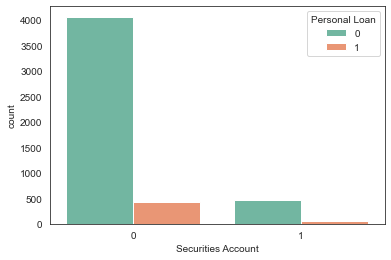

In [9]:

sns.set_style('white')
sns.countplot(data=df,x='Securities Account',hue='Personal Loan',palette='Set2')

It is clear that very few loan applicants have a securities account.

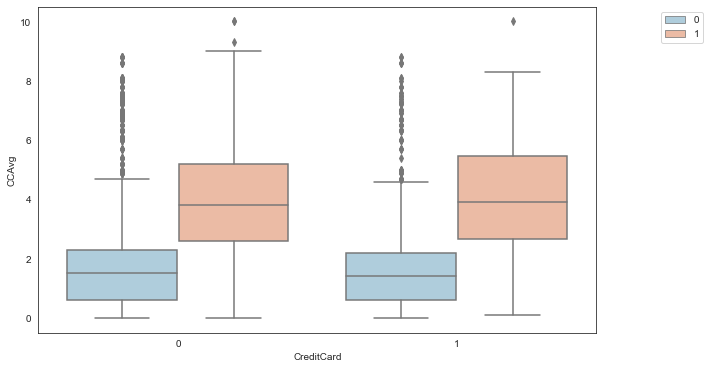

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot('CreditCard','CCAvg',hue='Personal Loan',data=df,palette='RdBu_r')
plt.legend(bbox_to_anchor=(1.2,1))

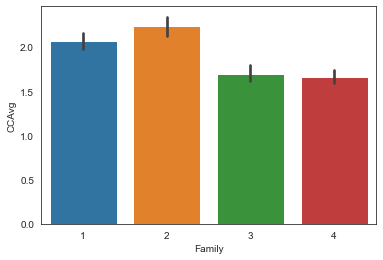

In [11]:
tip=df
sns.barplot(x=df["Family"],y=df["CCAvg"],data=tip)

# Doing basic EDA/Data cleaning

In [12]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

From the about result we come to know that almost all atributes are numeric.

In [13]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
df.shape

(5000, 14)

Knowing the Shape of the data: There are 5000 customers.

In [15]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Checking the  null values

In [16]:
df.isnull().values.any()


False

There are no null values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Finding unique data

In [18]:
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Find Mean

In [19]:
df.mean()

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

Find Median

In [20]:
df.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

Find Standard Deviation

In [21]:
df.std()

ID                    1443.520003
Age                     11.463166
Experience              11.467954
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Personal Loan            0.294621
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455637
dtype: float64

# Data visualization

Ploting histogram to check that if data columns are normal  or not

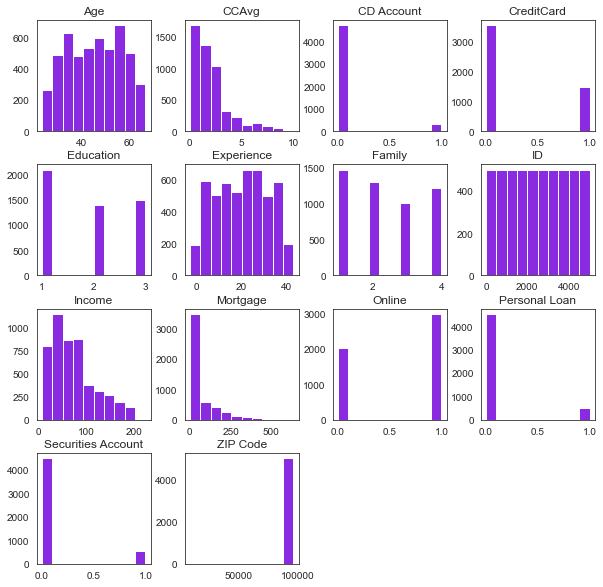

In [22]:
df.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

PairPlot

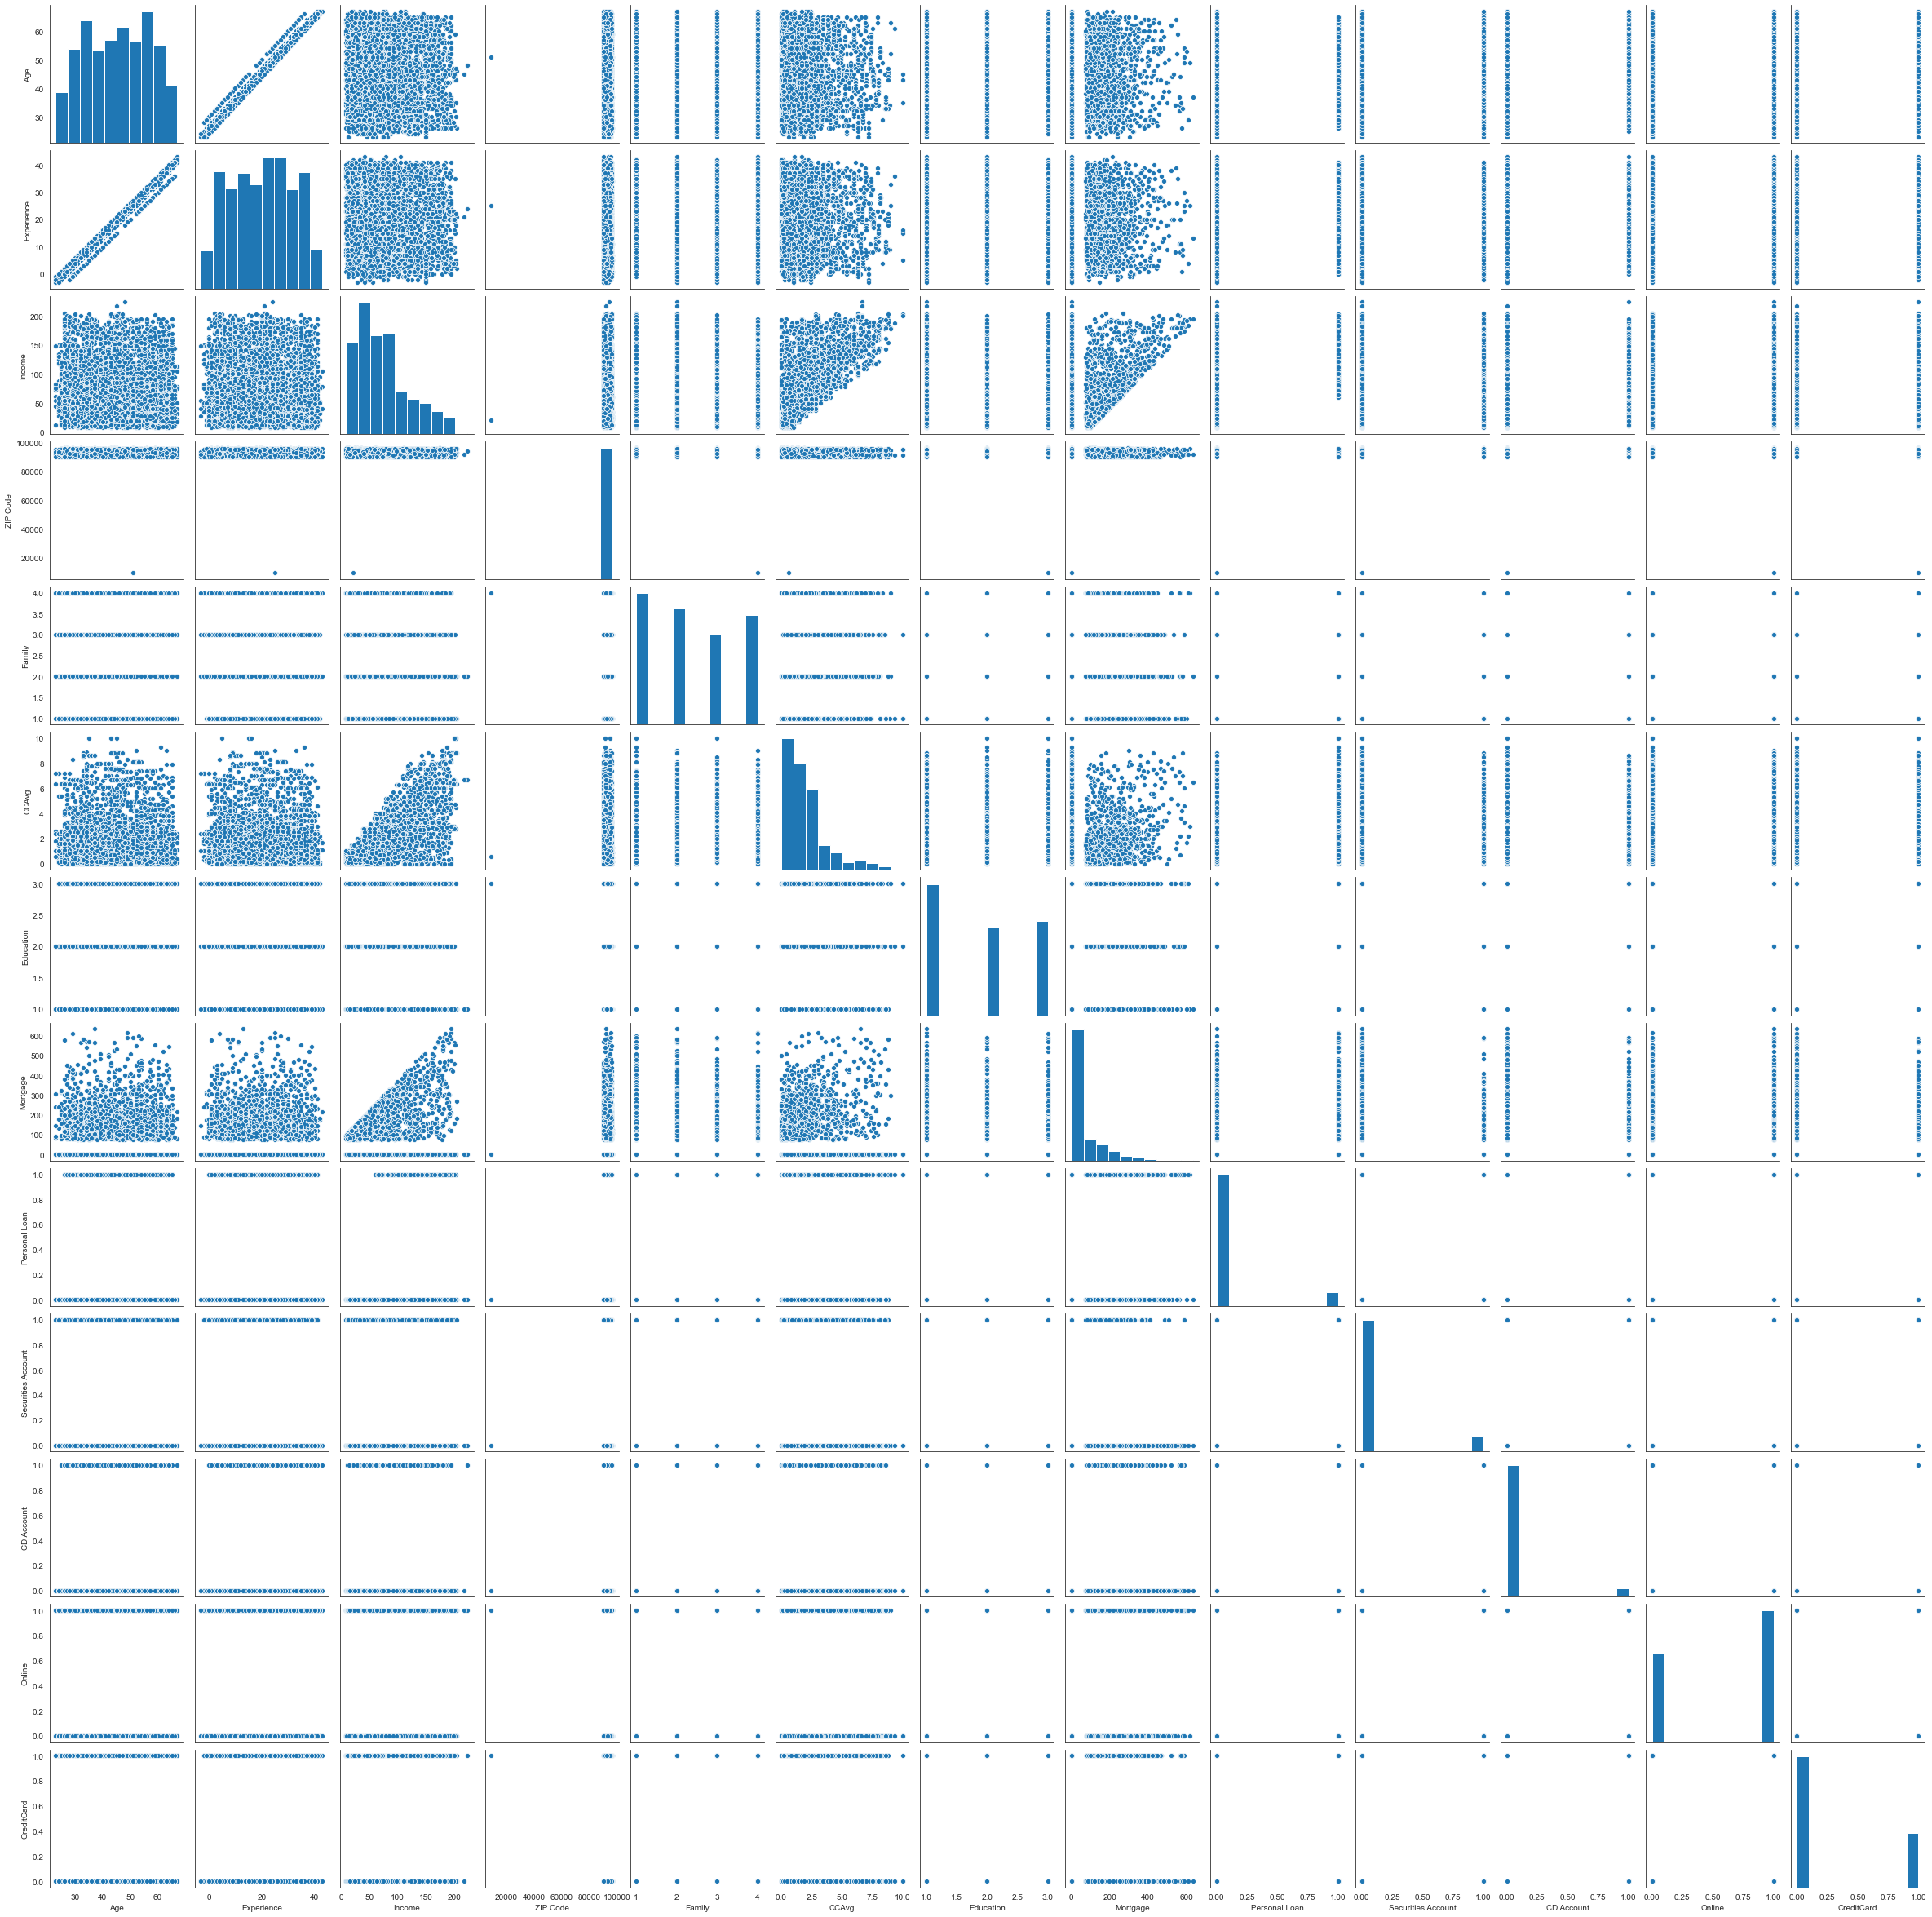

In [23]:
import seaborn as sns
sns.pairplot(df.iloc[:,1:])

Here we can see 1."Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
2."Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
We can see for 3."Income" , 4."CCAvg" , 5."Mortgage" distribution is positively skewed.
4.For 6."Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
For 7."CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
For 8."Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
Distributin of 9."Family" and 10."Education" are evenly distributed

Boxplot

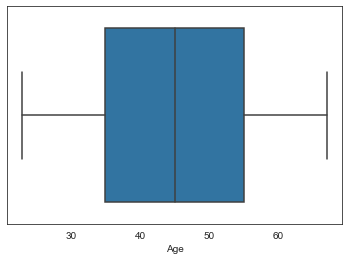

In [24]:
sns.boxplot(x=df["Age"])

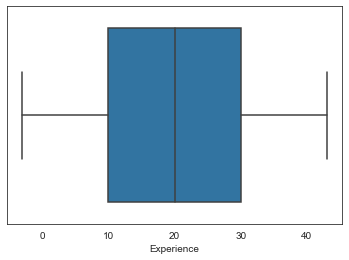

In [25]:
sns.boxplot(x=df["Experience"])

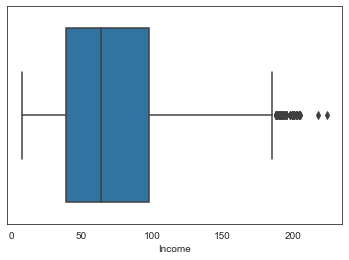

In [26]:
sns.boxplot(x=df["Income"])

ScatterPlot

Text(0.5, 1.0, 'Distribution of Education by Age and Experience')

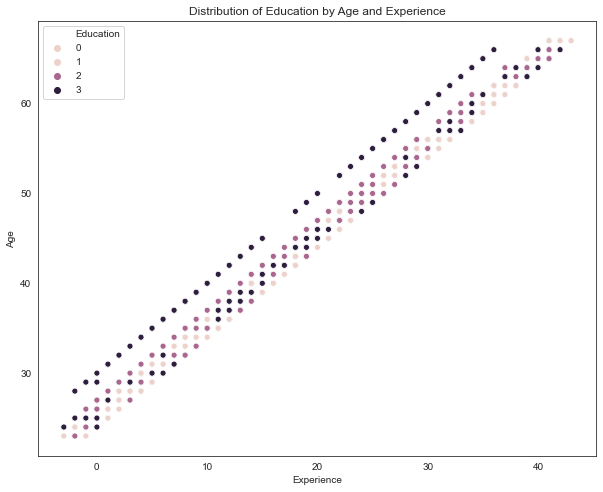

In [27]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age",data =df, hue = "Education")
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Distribution of Education by Age and Experience")

Experience and Age gives a positive correlation ,as Experience increases Age also increases.
We can see with the help of colors of education level that more people are in the under graduate level.

# Calculate the correlation matrix

In [28]:
cor=df.corr()
cor

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Heatmap--Showing correlation in figures

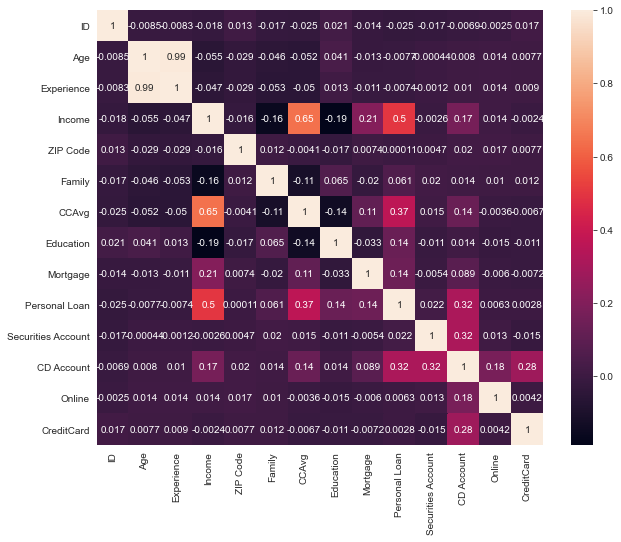

In [29]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

Here we can see "Age" feature is almost normally distributed where majority of customers are between age 30 to 60 years.Also we can see median is equal to mean.
"Experience" feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
We can see for "Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
For "Income" mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
For "CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
For "Mortage" we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
Distributin of "Family" and "Education" are evenly distributed
Income and CCAvg is moderately correlated.
Experience and Age gives a positive correlation.
Families with income less than 100K are less likely to take loan,than families with high income.
The customers whose education level is 1 is having more income than the others.
The customers with and without Personal Loan have high Mortage.
Families with income less than 100K are less likely to take loan,than families with high income.
Ther is no that much impact on Personal Loan if we consider Family attribute. But the Family with size 3 is taking more Personal loan as compare to other family size.
The Majority is the customers who do not have Personal loan have Securities Account.
The customers having no CDAccount do not have Personal loan.
Customers with Personal Loan have less count in both the conditions.

# Machine learning models

Logistic regression

Training and testing the data

The part of the data is used to build our machine learning model and is called as training data/training set,and the rest of the data is usedt acess how the model works and is called as test data.

Splitting the data into independent and dependent values,Independent variables are the input for a process that is being analyzes. Dependent variables are the output of the process. Here I have used the ‘train_test_split’ to split the data in 70:30 ratio i.e. 80% of the data will be used for training the model while 30% will be used for testing the model that is built out of it.

In this dataset y is the target/output/dependent x is the independent variable

In [30]:
x =df.iloc[:,0:9]
x

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
0,1,25,1,49,91107,4,1.6,1,0
1,2,45,19,34,90089,3,1.5,1,0
2,3,39,15,11,94720,1,1.0,1,0
3,4,35,9,100,94112,1,2.7,2,0
4,5,35,8,45,91330,4,1.0,2,0
...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0
4996,4997,30,4,15,92037,4,0.4,1,85
4997,4998,63,39,24,93023,2,0.3,3,0
4998,4999,65,40,49,90034,3,0.5,2,0


In [31]:
y = df.iloc[:,10]
y

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Securities Account, Length: 5000, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Logistic regression

In [33]:
import sklearn.metrics as metrics

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [35]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 89.20%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.892000    0.0     0.892     0.446000      0.795664
recall        1.000000    0.0     0.892     0.500000      0.892000
f1-score      0.942918    0.0     0.892     0.471459      0.841082
support    3122.000000  378.0     0.892  3500.000000   3500.000000
_______________________________________________
Confusion Matrix: 
 [[3122    0]
 [ 378    0]]

Test Result:
Accuracy Score: 90.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision     0.90400    0.0     0.904     0.45200      0.817216
recall        1.00000    0.0     0.904     0.50000      0.904000
f1-score      0.94958    0.0     0.904     0.47479      0.858420
support    1356.00000  144.0     0.904  1500.00000   1500.000000
_____________________________

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

print_score(knn_clf, x_train, y_train, x_test, y_test, train=True)
print_score(knn_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 89.74%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.900783    0.679245  0.897429     0.790014      0.876857
recall        0.994555    0.095238  0.897429     0.544896      0.897429
f1-score      0.945349    0.167053  0.897429     0.556201      0.861293
support    3122.000000  378.000000  0.897429  3500.000000   3500.000000
_______________________________________________
Confusion Matrix: 
 [[3105   17]
 [ 342   36]]

Test Result:
Accuracy Score: 89.27%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.902900    0.0  0.892667     0.451450      0.816221
recall        0.987463    0.0  0.892667     0.493732      0.892667
f1-score      0.943290    0.0  0.892667     0.471645      0.852734
support    1356.000000  144.0  0.892667  1500.000000   1500.0

# Support Vector machine

In [37]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3122.0  378.0       1.0     3500.0        3500.0
_______________________________________________
Confusion Matrix: 
 [[3122    0]
 [   0  378]]

Test Result:
Accuracy Score: 90.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision     0.90400    0.0     0.904     0.45200      0.817216
recall        1.00000    0.0     0.904     0.50000      0.904000
f1-score      0.94958    0.0     0.904     0.47479      0.858420
support    1356.00000  144.0     0.904  1500.00000   1500.000000
_______________________________________________
Confusion Matri

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(lr_clf, open(filename, 'wb'))
 

In [39]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.904


### Predictions on different samples

In [40]:
x.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage'],
      dtype='object')

In [41]:
test={'ID':[12, 23, 17], 'Age':[41, 37, 38], 
       'Experience':[3, 11, 14], 
       'Income':[56, 46, 130], 
       'ZIP Code':[92121, 93023, 95010], 
       'Family':[4, 5, 4],  
       'CCAvg':['1.50', '0.60', '4.70'], 
       'Education':[3, 3, 3], 
       'Mortgage':[0, 104, 134]}
test1=pd.DataFrame(test, columns=(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage']))
test1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
0,12,41,3,56,92121,4,1.50,3,0
1,23,37,11,46,93023,5,0.60,3,104
2,17,38,14,130,95010,4,4.70,3,134


In [42]:
lr_clf.predict(test1)  #prediction using Logostic Regression

array([0, 0, 0], dtype=int64)

In [43]:
knn_clf.predict(test1)  # prediction using KNN algorithm

array([1, 0, 0], dtype=int64)

In [44]:
svm_clf.predict(test1)  # prediction using svm

array([0, 0, 0], dtype=int64)

In [45]:
loaded_model.predict(test1)

array([0, 0, 0], dtype=int64)